In [3]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Loading Data

In [13]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(df.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [9]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [10]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [12]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [11]:
# Checking information about data.
print(df.info())
def metadata_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB
None


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.90,5506
count_rech_2g_6,float64,17568,52431,74.90,30
night_pck_user_6,float64,17568,52431,74.90,2
arpu_2g_6,float64,17568,52431,74.90,5389
date_of_last_rech_data_6,object,17568,52431,74.90,30
total_rech_data_6,float64,17568,52431,74.90,36
av_rech_amt_data_6,float64,17568,52431,74.90,792
max_rech_data_6,float64,17568,52431,74.90,47
count_rech_3g_6,float64,17568,52431,74.90,23
fb_user_6,float64,17568,52431,74.90,2


#### Data Cleaning

In [14]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability


In [15]:
# Combine missing values and data types into one DataFrame
pd.set_option('display.max_columns', None)
missing_values_info = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Data Type': df.dtypes
})

# Display the result
print(missing_values_info)

                          Missing Values Data Type
id                                     0     int64
circle_id                              0     int64
loc_og_t2o_mou                       702   float64
std_og_t2o_mou                       702   float64
loc_ic_t2o_mou                       702   float64
last_date_of_month_6                   0    object
last_date_of_month_7                 399    object
last_date_of_month_8                 733    object
arpu_6                                 0   float64
arpu_7                                 0   float64
arpu_8                                 0   float64
onnet_mou_6                         2768   float64
onnet_mou_7                         2687   float64
onnet_mou_8                         3703   float64
offnet_mou_6                        2768   float64
offnet_mou_7                        2687   float64
offnet_mou_8                        3703   float64
roam_ic_mou_6                       2768   float64
roam_ic_mou_7                  

In [17]:
#Converting columns into appropriate data types and extracting singe value columns.
# Columns with unique values < 29 are considered as categorical variables. 
# The number 30 is arrived at, by looking at the above metadata_matrix output. 

columns=df.columns
change_to_cat=[]
single_value_col=[]
for column in columns:
    unique_value_count=df[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
    if unique_value_count<=29 and unique_value_count!=0 and df[column].dtype in ['int','float']:
        change_to_cat.append(column)
print( ' Columns to change to categorical data type : \n' ,pd.DataFrame(change_to_cat), '\n')

 Columns to change to categorical data type : 
                     0
0           circle_id
1      loc_og_t2o_mou
2      std_og_t2o_mou
3      loc_ic_t2o_mou
4    std_og_t2c_mou_6
5    std_og_t2c_mou_7
6    std_og_t2c_mou_8
7    std_ic_t2o_mou_6
8    std_ic_t2o_mou_7
9    std_ic_t2o_mou_8
10    count_rech_3g_6
11    count_rech_3g_7
12    count_rech_3g_8
13   night_pck_user_6
14   night_pck_user_7
15   night_pck_user_8
16       monthly_2g_6
17       monthly_2g_7
18       monthly_2g_8
19       monthly_3g_6
20       monthly_3g_7
21       monthly_3g_8
22        sachet_3g_6
23        sachet_3g_7
24        sachet_3g_8
25          fb_user_6
26          fb_user_7
27          fb_user_8
28  churn_probability 



In [18]:
# Converting all the above columns having <=29 unique values into categorical data type.
df[change_to_cat]=df[change_to_cat].astype('category')

In [19]:
# Converting *sachet* variables to categorical data type 
sachet_columns = df.filter(regex='.*sachet.*', axis=1).columns.values

In [20]:
sachet_columns

array(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'], dtype=object)

In [21]:
df[['sachet_2g_6','sachet_2g_7']]

,sachet_2g_6,sachet_2g_7
0,0,0
1,0,0
2,0,0
3,0,0
4,7,6
...,...,...
69994,0,6
69995,0,0
69996,0,0
69997,0,0


In [22]:
# Converting *sachet* variables to categorical data type 

df[sachet_columns] = df[sachet_columns].astype('category')


In [23]:
#Changing datatype of date variables to datetime.
columns=df.columns
col_with_date=[]
import re
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
df[col_with_date].dtypes

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
dtype: object

In [24]:
# Checking the date format
df[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


In [26]:
for col in col_with_date:
    df[col]=pd.to_datetime(df[col], format="%m/%d/%Y")
df[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-22,2014-07-10,2014-08-24,NaT,NaT,NaT
1,2014-06-12,2014-07-10,2014-08-26,NaT,2014-07-08,NaT
2,2014-06-11,2014-07-22,2014-08-24,NaT,NaT,NaT
3,2014-06-15,2014-07-21,2014-08-25,NaT,NaT,NaT
4,2014-06-25,2014-07-26,2014-08-30,2014-06-25,2014-07-23,2014-08-20


### Filtering High Value Customers
Customers are High Values if their Average recharge amount of june and july is more than or equal to 70th percentile of Average recharge amount.

In [27]:
#Deriving Average recharge amount of June and July.
df['Average_rech_amt_6n7']=(df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [28]:
#Filtering based HIGH VALUED CUSTOMERS based on (Average_rech_amt_6n7 >= 70th percentile of Average_rech_amt_6n7)
df=df[(df['Average_rech_amt_6n7']>= df['Average_rech_amt_6n7'].quantile(0.7))]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21018 entries, 12 to 69996
Columns: 173 entries, id to Average_rech_amt_6n7
dtypes: category(32), datetime64[ns](6), float64(118), int64(14), object(3)
memory usage: 23.4+ MB


### Missing Value

In [30]:
#Checking for missing values.
missing_values = metadata_matrix(df)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
missing_values

,Datatype,Null_Percentage
count_rech_3g_6,category,62.43
max_rech_data_6,float64,62.43
count_rech_2g_6,float64,62.43
arpu_3g_6,float64,62.43
date_of_last_rech_data_6,datetime64[ns],62.43
night_pck_user_6,category,62.43
total_rech_data_6,float64,62.43
arpu_2g_6,float64,62.43
fb_user_6,category,62.43
av_rech_amt_data_6,float64,62.43


In [32]:
# Columns with high missing values , > 50%
metadata = metadata_matrix(df)
condition = metadata['Null_Percentage'] > 50 
high_missing_values = metadata[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
count_rech_3g_6,category,7896,13122,62.43,23
av_rech_amt_data_6,float64,7896,13122,62.43,703
max_rech_data_6,float64,7896,13122,62.43,43
count_rech_2g_6,float64,7896,13122,62.43,28
arpu_3g_6,float64,7896,13122,62.43,3499
date_of_last_rech_data_6,datetime64[ns],7896,13122,62.43,30
night_pck_user_6,category,7896,13122,62.43,2
total_rech_data_6,float64,7896,13122,62.43,34
arpu_2g_6,float64,7896,13122,62.43,3298
fb_user_6,category,7896,13122,62.43,2


In [33]:
# Dropping above columns with high missing values 
high_missing_value_columns = high_missing_values.index 
df.drop(columns=high_missing_value_columns, inplace=True)

In [34]:
# Looking at remaining columns with missing values 
metadata_matrix(df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_mou_8,float64,20363,655,3.12,14491
og_others_8,float64,20363,655,3.12,106
loc_og_t2f_mou_8,float64,20363,655,3.12,2654
loc_ic_t2t_mou_8,float64,20363,655,3.12,8085
spl_og_mou_8,float64,20363,655,3.12,2795
loc_og_t2m_mou_8,float64,20363,655,3.12,12795
loc_ic_t2m_mou_8,float64,20363,655,3.12,12491
loc_ic_t2f_mou_8,float64,20363,655,3.12,3958
loc_og_t2t_mou_8,float64,20363,655,3.12,8824
std_og_t2f_mou_8,float64,20363,655,3.12,1303


In [35]:
sixth_month_columns = []
for column in df.columns:
    x = re.search("6$", column)
    if x:
        sixth_month_columns.append(column)
# missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
metadata = metadata_matrix(df)
condition = metadata.index.isin(sixth_month_columns)
sixth_month_metadata = metadata[condition]
sixth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
isd_og_mou_6,float64,20795,223,1.06,859
spl_og_mou_6,float64,20795,223,1.06,2643
std_og_mou_6,float64,20795,223,1.06,13776
loc_ic_t2f_mou_6,float64,20795,223,1.06,4018
loc_ic_t2t_mou_6,float64,20795,223,1.06,8285
loc_ic_t2m_mou_6,float64,20795,223,1.06,12885
loc_ic_mou_6,float64,20795,223,1.06,14882
std_ic_t2t_mou_6,float64,20795,223,1.06,3805
std_ic_t2m_mou_6,float64,20795,223,1.06,5571
std_ic_t2f_mou_6,float64,20795,223,1.06,1652


In [36]:
sixth_month_meaningful_missing_condition = sixth_month_metadata['Null_Percentage'] == 1.06
sixth_month_meaningful_missing_cols = sixth_month_metadata[sixth_month_meaningful_missing_condition].index.values
sixth_month_meaningful_missing_cols

array(['isd_og_mou_6', 'spl_og_mou_6', 'std_og_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_t2o_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'std_og_t2c_mou_6', 'og_others_6', 'roam_ic_mou_6',
       'std_og_t2t_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2f_mou_6',
       'roam_og_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'onnet_mou_6',
       'offnet_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'loc_og_t2m_mou_6'], dtype=object)

In [37]:
df[sixth_month_meaningful_missing_cols] = df[sixth_month_meaningful_missing_cols].fillna(0)

In [38]:
metadata = metadata_matrix(df)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],20976,42,0.2,30
total_rech_num_6,int64,21018,0,0.0,94
total_rech_amt_6,int64,21018,0,0.0,2027
max_rech_amt_6,int64,21018,0,0.0,160
monthly_2g_6,category,21018,0,0.0,5
sachet_2g_6,category,21018,0,0.0,27
vol_3g_mb_6,float64,21018,0,0.0,4919
vol_2g_mb_6,float64,21018,0,0.0,5738
monthly_3g_6,category,21018,0,0.0,10
last_day_rch_amt_6,int64,21018,0,0.0,152


In [39]:
# Looking at 'recharge' related 6th month columns for customers with missing 'date_of_last_rech_6' 
condition = df['date_of_last_rech_6'].isnull()
df[condition].filter(regex='.*rech.*6$', axis=1).head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6
1575,0,0,0,NaT
2583,0,0,0,NaT
3008,0,0,0,NaT
3332,0,0,0,NaT
6809,0,0,0,NaT


In [40]:
df[condition].filter(regex='.*rech.*6$', axis=1).nunique()

total_rech_num_6       1
total_rech_amt_6       1
max_rech_amt_6         1
date_of_last_rech_6    0
dtype: int64

Notice, that the recharge related columns for customers with missing 'date_of_last_rech_6' has just one unique value. From the first few rows of the output, we see that this is 0.
Hence, 'date_of_last_rech_6' is missing since there were no recharges made in this month.
These are meaning missing values


In [41]:
# Check for missing values in 6th month variables
metadata = metadata_matrix(df)
metadata[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],20976,42,0.2,30
total_rech_num_6,int64,21018,0,0.0,94
total_rech_amt_6,int64,21018,0,0.0,2027
max_rech_amt_6,int64,21018,0,0.0,160
monthly_2g_6,category,21018,0,0.0,5
sachet_2g_6,category,21018,0,0.0,27
vol_3g_mb_6,float64,21018,0,0.0,4919
vol_2g_mb_6,float64,21018,0,0.0,5738
monthly_3g_6,category,21018,0,0.0,10
last_day_rch_amt_6,int64,21018,0,0.0,152


In [42]:
# Month : 7 
seventh_month_columns = df.filter(regex='7$', axis=1).columns
seventh_month_columns

Index(['last_date_of_month_7', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7',
       'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7',
       'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_7', 'sachet_3g_7', 'Average_rech_amt_6n7'],
      dtype='object')

In [43]:
seventh_month_metadata = metadata[metadata.index.isin(seventh_month_columns)]
seventh_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
isd_og_mou_7,float64,20810,208,0.99,864
ic_others_7,float64,20810,208,0.99,1119
spl_og_mou_7,float64,20810,208,0.99,2897
loc_ic_t2f_mou_7,float64,20810,208,0.99,4101
og_others_7,float64,20810,208,0.99,89
loc_ic_t2t_mou_7,float64,20810,208,0.99,8316
loc_ic_t2m_mou_7,float64,20810,208,0.99,12970
loc_ic_mou_7,float64,20810,208,0.99,14887
std_ic_t2t_mou_7,float64,20810,208,0.99,3896
std_ic_t2m_mou_7,float64,20810,208,0.99,5647


In [44]:
#  columns with meaningful missing in 7th month 
seventh_month_meaningful_missing_condition = seventh_month_metadata['Null_Percentage'] == .99
seventh_month_meaningful_missing_cols = seventh_month_metadata[seventh_month_meaningful_missing_condition].index.values
seventh_month_meaningful_missing_cols

array(['isd_og_mou_7', 'ic_others_7', 'spl_og_mou_7', 'loc_ic_t2f_mou_7',
       'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7',
       'spl_ic_mou_7', 'isd_ic_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7',
       'offnet_mou_7', 'loc_og_t2c_mou_7', 'onnet_mou_7', 'roam_ic_mou_7',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'roam_og_mou_7',
       'std_og_t2t_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_mou_7', 'loc_og_t2f_mou_7'], dtype=object)

In [46]:
# Imputation
df[seventh_month_meaningful_missing_cols] = df[seventh_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(df)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(seventh_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_7,datetime64[ns],20936,82,0.39,31
last_date_of_month_7,object,20998,20,0.10,1
ic_others_7,float64,21018,0,0.00,1119
isd_ic_mou_7,float64,21018,0,0.00,2795
spl_ic_mou_7,float64,21018,0,0.00,84
total_rech_num_7,int64,21018,0,0.00,96
total_ic_mou_7,float64,21018,0,0.00,15869
std_ic_mou_7,float64,21018,0,0.00,7083
std_ic_t2o_mou_7,category,21018,0,0.00,1
sachet_3g_7,category,21018,0,0.00,26


In [47]:
# Looking at 'recharge' related 7th month columns for customers with missing 'date_of_last_rech_7' 
condition = df['date_of_last_rech_7'].isnull()
df[condition].filter(regex='.*rech.*7$', axis=1).head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,Average_rech_amt_6n7
380,0,0,0,NaT,2510.5
1211,0,0,0,NaT,548.0
1728,0,0,0,NaT,393.0
3594,0,0,0,NaT,500.5
3625,0,0,0,NaT,790.5


In [48]:
df[condition].filter(regex='.*rech.*7$', axis=1).nunique()

total_rech_num_7         1
total_rech_amt_7         1
max_rech_amt_7           1
date_of_last_rech_7      0
Average_rech_amt_6n7    68
dtype: int64

**Observation: Missing Values in 'date_of_last_rech_7'**
=====================================================

Notice that the recharge-related columns for customers with missing 'date_of_last_rech_7' have just one unique value. From the first few rows of the output, we see that this value is 0.

This suggests that 'date_of_last_rech_7' is missing because there were no recharges made in this month. Therefore, these are indeed missing values.

In [49]:
#Month 8
eighth_month_columns = df.filter(regex="8$", axis=1).columns
metadata = metadata_matrix(df)
condition = metadata.index.isin(eighth_month_columns)
eighth_month_metadata = metadata[condition]
eighth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2m_mou_8,float64,20363,655,3.12,10323
loc_og_t2t_mou_8,float64,20363,655,3.12,8824
loc_og_t2f_mou_8,float64,20363,655,3.12,2654
loc_og_t2c_mou_8,float64,20363,655,3.12,1472
loc_og_mou_8,float64,20363,655,3.12,14507
std_og_t2t_mou_8,float64,20363,655,3.12,8937
std_og_t2f_mou_8,float64,20363,655,3.12,1303
std_og_t2c_mou_8,category,20363,655,3.12,1
std_og_mou_8,float64,20363,655,3.12,12663
isd_og_mou_8,float64,20363,655,3.12,736


In [50]:
#  columns with meaningful missing in 8th month 
eighth_month_meaningful_missing_condition = eighth_month_metadata['Null_Percentage'] == 3.12
eighth_month_meaningful_missing_cols = eighth_month_metadata[eighth_month_meaningful_missing_condition].index.values
eighth_month_meaningful_missing_cols

array(['std_og_t2m_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'ic_others_8',
       'isd_ic_mou_8', 'loc_ic_t2t_mou_8', 'spl_ic_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2o_mou_8', 'loc_og_t2m_mou_8', 'std_ic_t2f_mou_8',
       'offnet_mou_8', 'roam_og_mou_8', 'onnet_mou_8', 'roam_ic_mou_8'],
      dtype=object)

In [52]:
# Imputation
df[eighth_month_meaningful_missing_cols] = df[eighth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(df)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(eighth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],20603,415,1.97,31
last_date_of_month_8,object,20910,108,0.51,1
isd_ic_mou_8,float64,21018,0,0.00,2720
total_ic_mou_8,float64,21018,0,0.00,15373
spl_ic_mou_8,float64,21018,0,0.00,81
ic_others_8,float64,21018,0,0.00,1041
std_ic_mou_8,float64,21018,0,0.00,6715
std_ic_t2m_mou_8,float64,21018,0,0.00,5347
loc_ic_mou_8,float64,21018,0,0.00,14491
std_ic_t2t_mou_8,float64,21018,0,0.00,3694


In [53]:
# Looking at 'recharge' related 8th month columns for customers with missing 'date_of_last_rech_8' 
condition = df['date_of_last_rech_8'].isnull()
df[condition].filter(regex='.*rech.*8$', axis=1).head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8
183,0,0,0,NaT
224,0,0,0,NaT
1015,0,0,0,NaT
1127,0,0,0,NaT
1395,0,0,0,NaT


In [54]:
df[condition].filter(regex='.*rech.*8$', axis=1).nunique()

total_rech_num_8       1
total_rech_amt_8       1
max_rech_amt_8         1
date_of_last_rech_8    0
dtype: int64

In [56]:
ninth_month_columns = df.filter(regex="9$", axis=1).columns
metadata = metadata_matrix(df)
condition = metadata.index.isin(ninth_month_columns)
ninth_month_metadata = metadata[condition]
ninth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count


In [57]:
metadata = metadata_matrix(df)
metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],20603,415,1.97,31
last_date_of_month_8,object,20910,108,0.51,1
date_of_last_rech_7,datetime64[ns],20936,82,0.39,31
loc_og_t2o_mou,category,20943,75,0.36,1
std_og_t2o_mou,category,20943,75,0.36,1
loc_ic_t2o_mou,category,20943,75,0.36,1
date_of_last_rech_6,datetime64[ns],20976,42,0.20,30
last_date_of_month_7,object,20998,20,0.10,1
isd_ic_mou_8,float64,21018,0,0.00,2720
total_ic_mou_8,float64,21018,0,0.00,15373


Dropping columns with one unique value.

In [58]:
metadata=metadata_matrix(df)
singular_value_cols=metadata[metadata['Unique_Values_Count']==1].index.values

In [59]:
singular_value_cols

array(['last_date_of_month_8', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_7', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'last_date_of_month_6',
       'circle_id', 'std_og_t2c_mou_8', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_6'], dtype=object)

In [60]:
#Dropping singular value columns.
df.drop(columns=singular_value_cols,inplace=True)

In [61]:
# Dropping date columns 
# since they are not usage related columns and can't be used for modelling 
date_columns = df.filter(regex='^date.*').columns
df.drop(columns=date_columns, inplace=True)
metadata_matrix(df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
id,int64,21018,0,0.0,21018
total_ic_mou_7,float64,21018,0,0.0,15869
total_rech_num_8,int64,21018,0,0.0,90
total_rech_num_7,int64,21018,0,0.0,96
total_rech_num_6,int64,21018,0,0.0,94
ic_others_8,float64,21018,0,0.0,1041
ic_others_7,float64,21018,0,0.0,1119
ic_others_6,float64,21018,0,0.0,1011
isd_ic_mou_8,float64,21018,0,0.0,2720
isd_ic_mou_7,float64,21018,0,0.0,2795


In [62]:
df['Churn'] = 0
churned_customers = df.query('total_og_mou_9 == 0 & total_ic_mou_9 == 0 & vol_2g_mb_9 == 0 &  vol_3g_mb_9 == 0').index
df.loc[churned_customers,'Churn']=1
df['Churn'] = df['Churn'].astype('category')

UndefinedVariableError: name 'total_og_mou_9' is not defined

In [63]:
df['Churn'].value_counts(normalize=True).to_frame()

,proportion
Churn,
0,1.0


### Exploratory Data Analysis

In [65]:
df.describe

<bound method NDFrame.describe of           id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
12        12   439.919   397.946   392.024       244.46       108.31   
15        15   580.549   377.294   338.286        10.43        24.99   
23        23  1130.948   905.506   479.762       859.53       372.71   
24        24   371.974   352.069   240.449        93.18        38.29   
25        25   362.951   321.763   689.603       193.71       124.53   
...      ...       ...       ...       ...          ...          ...   
69981  69981   357.480   717.944   252.875       486.49       378.21   
69983  69983   256.106   173.079   277.018       399.01       283.63   
69984  69984  1106.130  1609.381  1686.392        84.91       133.44   
69990  69990   240.088   474.411   699.991         7.19        16.78   
69996  69996   372.088   258.374   279.782        77.13        68.44   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
12           42.98    

In [67]:
categorical_columns = df.dtypes[df.dtypes == 'category'].index.values
print('Mode : ')
df[categorical_columns].mode().T

Mode : 


,0
monthly_2g_6,0
monthly_2g_7,0
monthly_2g_8,0
sachet_2g_6,0
sachet_2g_7,0
sachet_2g_8,0
monthly_3g_6,0
monthly_3g_7,0
monthly_3g_8,0
sachet_3g_6,0


#### Univariate Analysis


In [69]:
churned_customers = df[df['Churn'] == 1]
non_churned_customers = df[df['Churn'] == 0]


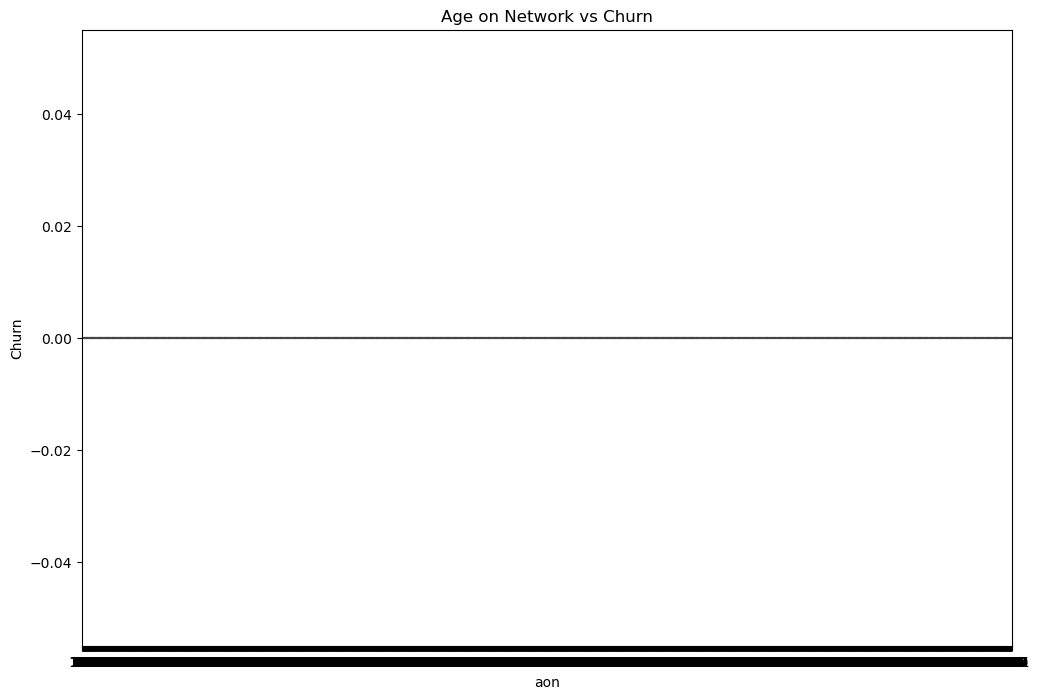

In [70]:
plt.figure(figsize=(12,8))
sns.violinplot(x='aon', y='Churn', data=df)
plt.title('Age on Network vs Churn')
plt.show()

### Bivariate Analysis

### Data Preparation

### Derived Variables


#### Outlier Treatment